In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

In [43]:
u_1 = np.array([2, 2])
u_2 = np.array([-5, -3])

In [44]:
cov_1 = np.array([[0.5, 2], [1, 1]])
cov_2 = np.array([[1.5, 2], [2, 1]])

In [45]:
d1 = np.random.multivariate_normal(u_1, cov_1, 500) # cat
d2 = np.random.multivariate_normal(u_2, cov_2, 500) # dog

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_256\1953260279.py:1: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  d1 = np.random.multivariate_normal(u_1, cov_1, 500) # cat
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_256\1953260279.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  d2 = np.random.multivariate_normal(u_2, cov_2, 500) # dog


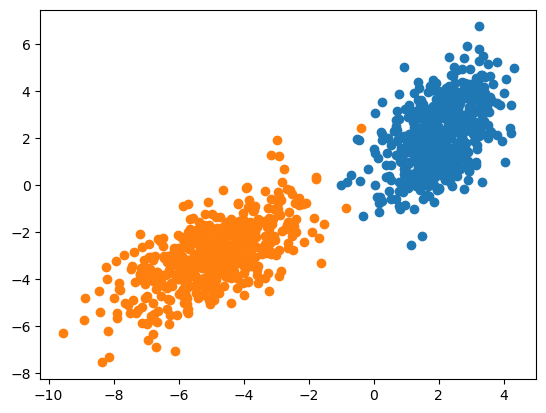

In [46]:
plt.scatter(d1[:,0], d1[:, 1])
plt.scatter(d2[:, 0], d2[:, 1])

In [47]:
dataset = np.ones((1000, 4))

In [48]:
dataset

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       ...,
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [49]:
d1.shape

(500, 2)

In [50]:
dataset[:500, 1:3] = d1

In [51]:
dataset[500:, 1:3] = d2

In [52]:
dataset[:4]

array([[1.        , 3.34148646, 0.11872059, 1.        ],
       [1.        , 3.21836226, 4.38350065, 1.        ],
       [1.        , 0.96563369, 0.66242402, 1.        ],
       [1.        , 1.08092034, 1.73909095, 1.        ]])

In [53]:
dataset[:500,-1] = 0

In [54]:
dataset[:4]

array([[1.        , 3.34148646, 0.11872059, 0.        ],
       [1.        , 3.21836226, 4.38350065, 0.        ],
       [1.        , 0.96563369, 0.66242402, 0.        ],
       [1.        , 1.08092034, 1.73909095, 0.        ]])

In [55]:
dataset[-4:]

array([[ 1.        , -4.84054771, -3.60138664,  1.        ],
       [ 1.        , -4.01455574, -2.07415448,  1.        ],
       [ 1.        , -5.43530702, -4.17861917,  1.        ],
       [ 1.        , -3.90091435, -0.08738039,  1.        ]])

In [56]:
np.random.shuffle(dataset)

In [57]:
dataset[:-4]

array([[ 1.        ,  3.64665943,  3.56351436,  0.        ],
       [ 1.        ,  2.26131718,  0.78196003,  0.        ],
       [ 1.        ,  2.81472295,  2.6216201 ,  0.        ],
       ...,
       [ 1.        ,  3.23992153,  5.25940674,  0.        ],
       [ 1.        ,  0.2088839 , -0.5199745 ,  0.        ],
       [ 1.        ,  1.96788288,  1.49062542,  0.        ]])

In [58]:
x_train = dataset[:800, :-1]
y_train = dataset[:800, -1]

x_test = dataset[800:, :-1]
y_test = dataset[800:, -1]

In [77]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(800, 3) (200, 3) (800, 1) (200, 1)


In [60]:
y_train = y_train.reshape((-1, 1))
y_train.shape

(800, 1)

In [61]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [62]:
def hypothesis(X, theta):
    return 1/(1 + np.exp(-(np.dot(X, theta))))
    
# def hypothesis(X, theta):
#     return sigmoid(np.dot(X, theta))

In [63]:
def cost(X, Y, theta):
    
    y_p = hypothesis(X, theta)
    
    loss = -1*(np.mean(Y*np.log(y_p) + (1- Y)*np.log(1 - y_p)))
    
    return loss

In [64]:
def gradient(X, Y, theta):
    
    y_p = hypothesis(X, theta)
    
    grad = np.dot(X.T , (Y - y_p))
    
    return grad/X.shape[0]

In [65]:
def gradient_descent(X, Y, learning_rate = 0.3, epochs = 100):
    
    m,n = X.shape
    
    theta = np.zeros((n , 1))
    print(theta.shape)
    cost_epoch = []
    
    for i in range(epochs):
        
        print('The algo is on epoch no : ',i, end = '\r')
        
        loss = cost(X, Y, theta)
        
        grad = gradient(X, Y, theta)
        
        cost_epoch.append(loss)
        
        theta = theta + learning_rate*grad
        
    print(grad.shape, theta.shape, y_train.shape,x_train.shape)
    return theta, cost_epoch    


In [66]:
theta , cost = gradient_descent(x_train, y_train, learning_rate=0.03, epochs = 2000)

(3, 1)


(3, 1) (3, 1) (800, 1) (800, 3)


In [67]:
theta

array([[-0.95742588],
       [-1.73885275],
       [-0.8384979 ]])

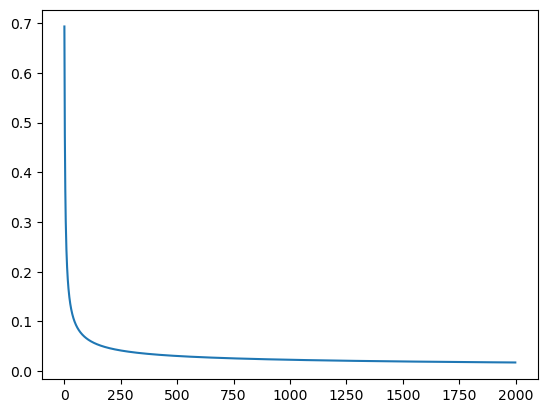

In [68]:
plt.plot(cost)

In [69]:
y_test = y_test.reshape((-1, 1))
y_test.shape

(200, 1)

In [70]:
def predict(X,theta):
    
    y_p = hypothesis(X, theta)
    
    y_pred = []
    for i in y_p:
        
        if i >= 0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    y_pred = np.array(y_pred)        
    
    return y_pred

In [71]:
pred = predict(x_test, theta)

# now reshape of prediction for accuracy

In [72]:
pred = pred.reshape((-1, 1))

In [73]:
def accuracy(pred, label):
    
    temp = 0
    
    for i in range(pred.shape[0]):
        
        if pred[i]==label[i]:
            temp+=1
        else:
            pass
    print("Accuracy = ",(temp/pred.shape[0])*100 ,"%", sep = '')   

In [74]:
accuracy(pred, y_test)

Accuracy = 100.0%


In [75]:
x_test.shape

(200, 3)

In [76]:
a = np.array([1,6.434,-3.31])

predict(a, theta)

array([0])